## Sentiment Analysis of Twitter Tweets

In [1]:
#Importing all the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [2]:
#Read the file into a pandas dataframe
df = pd.read_csv('tweets.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#Printing the size of the dataframe
print('Size of the dataframe', (df.shape))

Size of the dataframe (9093, 3)


In [4]:
#Renaming the columns
df.rename(columns = {'tweet_text' : 'Tweet', 'emotion_in_tweet_is_directed_at' : 'Emotion directed at', 
                     'is_there_an_emotion_directed_at_a_brand_or_product' : 'Class'}, inplace=True)
df.head()

,Tweet,Emotion directed at,Class
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
#Using info() to generate information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
Tweet                  9092 non-null object
Emotion directed at    3291 non-null object
Class                  9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


### Interpretation:
#1) 'Tweet' has one missing record.
#2) 'Emotion directed at' has many missing records.
#3) All the 3 columns are of 'object' type.

In [6]:
#Dropping the rows which do not have entries for 'Emotion directed at'
df.dropna(inplace=True)
print('Size of the dataframe:', (df.shape))

Size of the dataframe: (3291, 3)


In [7]:
#Checking any non-null entries in the columns
df.isnull().sum()

Tweet                  0
Emotion directed at    0
Class                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
Tweet                  3291 non-null object
Emotion directed at    3291 non-null object
Class                  3291 non-null object
dtypes: object(3)
memory usage: 102.8+ KB


In [9]:
#Printing the top 20 records of the dataframe
df.head(20)

,Tweet,Emotion directed at,Class
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion


In [10]:
#Reset the index of the records
df.reset_index(drop=True, inplace=True)
df.head(20)

,Tweet,Emotion directed at,Class
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
6,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
7,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
8,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion
9,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion


### Text Preprocessing:
#### 1) Twitter Handles have no impact on the sentiment of the tweet. Therefore the Twitter Handles in all the tweets can be removed.

In [11]:
#Function to remove Twitter Handles
def remove_twitterhandle(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i,'',input_text)
        
    return input_text

In [12]:
df['Tidy Tweet'] = np.vectorize(remove_twitterhandle)(df['Tweet'], '@[\w]+')

In [13]:
df.head()

,Tweet,Emotion directed at,Class,Tidy Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Know about ? Awesome iPad/iPhone app that yo...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Can not wait for #iPad 2 also. They should sa...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,I hope this year's festival isn't as crashy a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff on Fri #SXSW: Marissa Mayer (Goog...


In [14]:
#Removing the 'Tweet' column 
df.drop('Tweet', axis=1, inplace=True)
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iPhone,Negative emotion,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,iPad or iPhone App,Positive emotion,Know about ? Awesome iPad/iPhone app that yo...
2,iPad,Positive emotion,Can not wait for #iPad 2 also. They should sa...
3,iPad or iPhone App,Negative emotion,I hope this year's festival isn't as crashy a...
4,Google,Positive emotion,great stuff on Fri #SXSW: Marissa Mayer (Goog...


#### 2) Removing Punctuation and other characters except '#'

In [15]:
#Removing punctuation and other characters except'#'
df = df.applymap(lambda s: re.sub('[^0-9a-zA-Z#]',' ',s))
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iPhone,Negative emotion,I have a 3G iPhone After 3 hrs tweeting at ...
1,iPad or iPhone App,Positive emotion,Know about Awesome iPad iPhone app that yo...
2,iPad,Positive emotion,Can not wait for #iPad 2 also They should sa...
3,iPad or iPhone App,Negative emotion,I hope this year s festival isn t as crashy a...
4,Google,Positive emotion,great stuff on Fri #SXSW Marissa Mayer Goog...


#### 3) Converting all the words in the tweet to its lower case form

In [16]:
#Converting to lower case
df = df.applymap(lambda x: x.lower())
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iphone,negative emotion,i have a 3g iphone after 3 hrs tweeting at ...
1,ipad or iphone app,positive emotion,know about awesome ipad iphone app that yo...
2,ipad,positive emotion,can not wait for #ipad 2 also they should sa...
3,ipad or iphone app,negative emotion,i hope this year s festival isn t as crashy a...
4,google,positive emotion,great stuff on fri #sxsw marissa mayer goog...


#### 4) Removing all the extra spaces in the tweets

In [17]:
#Removing all the extra spaces
df = df.applymap(lambda x: x.strip())
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iphone,negative emotion,i have a 3g iphone after 3 hrs tweeting at #r...
1,ipad or iphone app,positive emotion,know about awesome ipad iphone app that you...
2,ipad,positive emotion,can not wait for #ipad 2 also they should sal...
3,ipad or iphone app,negative emotion,i hope this year s festival isn t as crashy as...
4,google,positive emotion,great stuff on fri #sxsw marissa mayer googl...


#### 5) Replacing the accented characters with its equivalent ASCII character

In [18]:
#Removing all the accented charcters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [19]:
df['Tidy Tweet'] = np.vectorize(remove_accented_chars)(df['Tidy Tweet'])

In [20]:
df.head(20)

,Emotion directed at,Class,Tidy Tweet
0,iphone,negative emotion,i have a 3g iphone after 3 hrs tweeting at #r...
1,ipad or iphone app,positive emotion,know about awesome ipad iphone app that you...
2,ipad,positive emotion,can not wait for #ipad 2 also they should sal...
3,ipad or iphone app,negative emotion,i hope this year s festival isn t as crashy as...
4,google,positive emotion,great stuff on fri #sxsw marissa mayer googl...
5,android,positive emotion,#sxsw is just starting #ctia is around the co...
6,ipad or iphone app,positive emotion,beautifully smart and simple idea rt wrote a...
7,apple,positive emotion,counting down the days to #sxsw plus strong ca...
8,android,positive emotion,excited to meet the at #sxsw so i can show th...
9,android app,positive emotion,find amp start impromptu parties at #sxsw wi...


#### 6) Stemming

In [21]:
tokenized_tweet = df['Tidy Tweet'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0    [i, have, a, 3g, iphone, after, 3, hrs, tweeti...
1    [know, about, awesome, ipad, iphone, app, that...
2    [can, not, wait, for, #ipad, 2, also, they, sh...
3    [i, hope, this, year, s, festival, isn, t, as,...
4    [great, stuff, on, fri, #sxsw, marissa, mayer,...
5    [#sxsw, is, just, starting, #ctia, is, around,...
6    [beautifully, smart, and, simple, idea, rt, wr...
7    [counting, down, the, days, to, #sxsw, plus, s...
8    [excited, to, meet, the, at, #sxsw, so, i, can...
9    [find, amp, start, impromptu, parties, at, #sx...
Name: Tidy Tweet, dtype: object

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head(10)

0    [i, have, a, 3g, iphon, after, 3, hr, tweet, a...
1    [know, about, awesom, ipad, iphon, app, that, ...
2    [can, not, wait, for, #ipad, 2, also, they, sh...
3    [i, hope, thi, year, s, festiv, isn, t, as, cr...
4    [great, stuff, on, fri, #sxsw, marissa, mayer,...
5    [#sxsw, is, just, start, #ctia, is, around, th...
6    [beauti, smart, and, simpl, idea, rt, wrote, a...
7    [count, down, the, day, to, #sxsw, plu, strong...
8    [excit, to, meet, the, at, #sxsw, so, i, can, ...
9    [find, amp, start, impromptu, parti, at, #sxsw...
Name: Tidy Tweet, dtype: object

In [23]:
len(tokenized_tweet)

3291

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Tidy Tweet'] = tokenized_tweet

In [25]:
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iphone,negative emotion,i have a 3g iphon after 3 hr tweet at #rise au...
1,ipad or iphone app,positive emotion,know about awesom ipad iphon app that you ll l...
2,ipad,positive emotion,can not wait for #ipad 2 also they should sale...
3,ipad or iphone app,negative emotion,i hope thi year s festiv isn t as crashi as th...
4,google,positive emotion,great stuff on fri #sxsw marissa mayer googl t...


#### WordCloud of the common words in the tweet

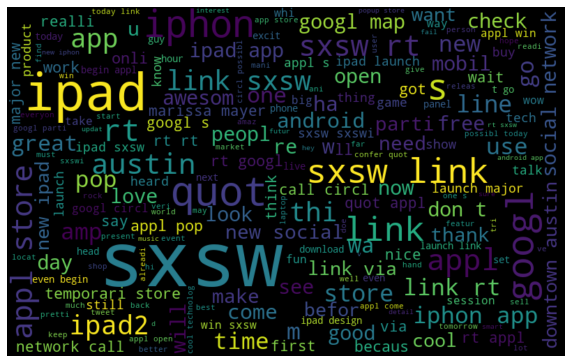

In [26]:
all_words = ' '.join([text for text in df['Tidy Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Wordcloud of the positive tweets

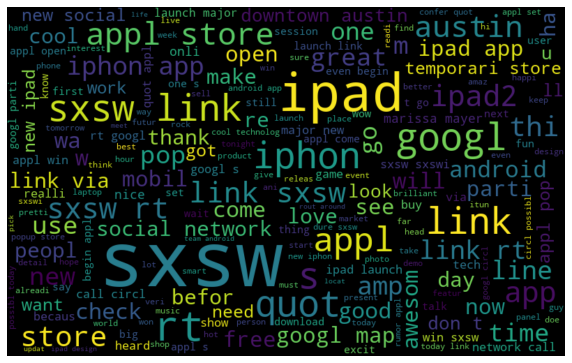

In [27]:
positive_words =' '.join([text for text in df['Tidy Tweet'][df['Class'] == 'positive emotion' ]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Wordcloud of the negative tweets

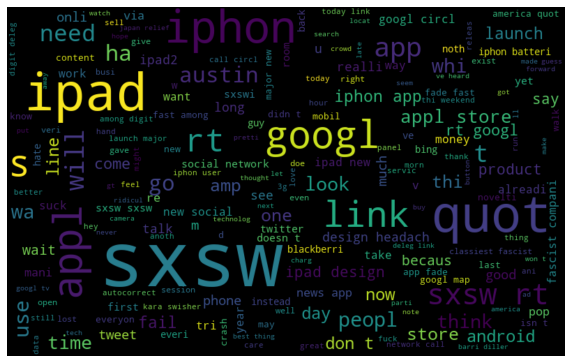

In [28]:
negative_words =' '.join([text for text in df['Tidy Tweet'][df['Class'] == 'negative emotion']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Interpretation:
- There isn't much of a difference between the wordcloud of positive tweets and negative tweets. In the sense not many words can be found in both the classes of tweets which can be identified as positive or negative.
- SXSW seem to be a common word in all the tweets. It is a hashtag. 
- #SXSW in the tweets do not express any sentiment, either positive or negative. It can be removed from all the tweets. 

#### Handling Hashtags

In [29]:
#Extracting all the hashtags used in all the tweets
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [30]:
#Hashtags used in 'positive emotion' tweets  

HT_positive = hashtag_extract(df['Tidy Tweet'][df['Class'] == 'positive emotion'])

#Hashtags used in 'negative emotion' tweets
HT_negative = hashtag_extract(df['Tidy Tweet'][df['Class'] == 'negative emotion'])

In [31]:
#Unnesting List
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

#### Displaying top 10 frequently used hashtags in 'positive emotion tweets'

In [32]:
import nltk
a = nltk.FreqDist(HT_positive)
a

FreqDist({'sxsw': 2689, 'appl': 160, 'ipad2': 116, 'sxswi': 89, 'ipad': 86, 'iphon': 67, 'googl': 65, 'android': 38, 'austin': 37, 'tech': 26, ...})

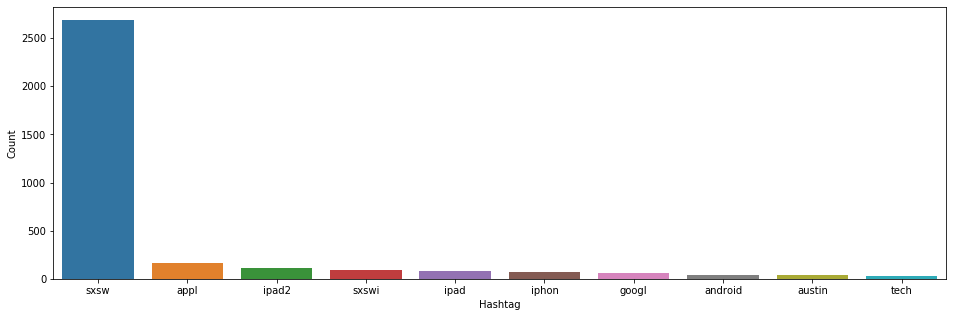

In [33]:
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
#Selecting Top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Displaying top 10 frequently used hashtags in 'negative emotion' tweets

In [34]:
b = nltk.FreqDist(HT_negative)
b

FreqDist({'sxsw': 519, 'ipad': 19, 'appl': 15, 'iphon': 11, 'fail': 11, 'sxswi': 10, 'googl': 9, 'tapworthi': 9, 'ipad2': 7, 'japan': 7, ...})

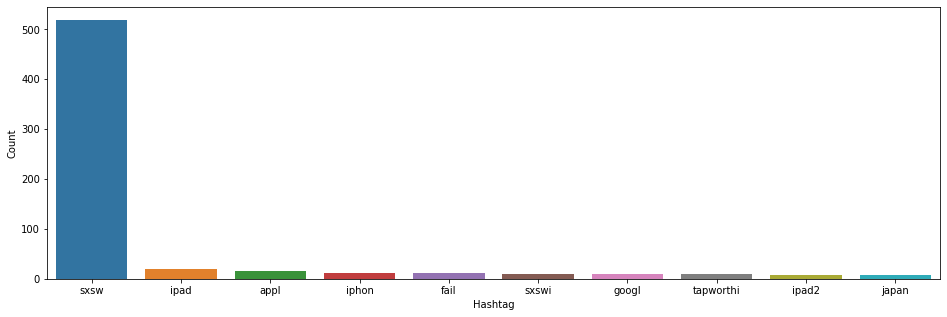

In [35]:
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Interpretation:
- #sxsw can be removed as it is a non discriminatory feature across the tweets.
- None of the hashtags discriminate the two classes of emotion. Therefore all the hashtags can be removed from all the tweets.

#### 7) Removing all the hashtags in all the tweets

In [36]:
#Removing all the hashtags
def remove_hashtags(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i,'',input_text)
        
    return input_text

In [37]:
df['Tidy Tweet'] = np.vectorize(remove_hashtags)(df['Tidy Tweet'], '#[\w]+')

In [38]:
df.head(20)

,Emotion directed at,Class,Tidy Tweet
0,iphone,negative emotion,i have a 3g iphon after 3 hr tweet at austin ...
1,ipad or iphone app,positive emotion,know about awesom ipad iphon app that you ll l...
2,ipad,positive emotion,can not wait for 2 also they should sale them...
3,ipad or iphone app,negative emotion,i hope thi year s festiv isn t as crashi as th...
4,google,positive emotion,great stuff on fri marissa mayer googl tim o ...
5,android,positive emotion,is just start is around the corner and is o...
6,ipad or iphone app,positive emotion,beauti smart and simpl idea rt wrote about our...
7,apple,positive emotion,count down the day to plu strong canadian dol...
8,android,positive emotion,excit to meet the at so i can show them my sp...
9,android app,positive emotion,find amp start impromptu parti at with http b...


#### 8) Removing all the numbers in the tweets - They do not express any sentiment of the tweet. 

In [39]:
#Removing all the numbers in the tweets
df = df.applymap(lambda s: re.sub('[^a-zA-Z]',' ',s))
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iphone,negative emotion,i have a g iphon after hr tweet at austin ...
1,ipad or iphone app,positive emotion,know about awesom ipad iphon app that you ll l...
2,ipad,positive emotion,can not wait for also they should sale them...
3,ipad or iphone app,negative emotion,i hope thi year s festiv isn t as crashi as th...
4,google,positive emotion,great stuff on fri marissa mayer googl tim o ...


In [40]:
#Assigning 'negative emotion' to 0 and 'positive emotion' to 1
df['Class'] = df['Class'].map({'positive emotion':1,'negative emotion':0})
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iphone,0.0,i have a g iphon after hr tweet at austin ...
1,ipad or iphone app,1.0,know about awesom ipad iphon app that you ll l...
2,ipad,1.0,can not wait for also they should sale them...
3,ipad or iphone app,0.0,i hope thi year s festiv isn t as crashi as th...
4,google,1.0,great stuff on fri marissa mayer googl tim o ...


In [41]:
#Converting the data type of 'Class' to 'category'
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].astype('int64')
df.head()

,Emotion directed at,Class,Tidy Tweet
0,iphone,0,i have a g iphon after hr tweet at austin ...
1,ipad or iphone app,1,know about awesom ipad iphon app that you ll l...
2,ipad,1,can not wait for also they should sale them...
3,ipad or iphone app,0,i hope thi year s festiv isn t as crashi as th...
4,google,1,great stuff on fri marissa mayer googl tim o ...


#### Creating Train-Test Split

In [42]:
#Creating Feature Set X and Target Set y
X = df['Tidy Tweet']
y = df['Class']

In [43]:
#Creating Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Building the Bag of Words Model - Count Vectorizer

In [44]:
#Building the Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer_matrix = vectorizer.fit_transform(X_train)

In [45]:
vectorizer_matrix.shape

(2468, 3433)

In [46]:
vectorizer_matrix = vectorizer_matrix.toarray()

In [47]:
#Display the count of each feature of the Count Vectorizer matrix
vectorizer_features = vectorizer.get_feature_names()
dist = np.sum(vectorizer_matrix, axis=0)

for tag, count in zip(vectorizer_features, dist):
    print (count, tag)

4 aapl
1 aaron
1 abacu
1 abandon
1 aber
1 abil
6 abl
98 about
1 abroad
4 absolut
4 abt
1 abuzz
2 acc
1 accel
3 access
2 accessori
1 accommod
1 accord
1 account
2 achiev
1 acknowledg
10 aclu
3 acquir
3 across
19 action
3 activ
3 actsofshar
15 actual
13 ad
1 adam
2 adapt
2 add
3 addict
2 addit
1 address
1 adfon
1 admiss
6 admit
1 ado
4 adopt
1 advanc
1 advent
1 adventur
1 advertis
2 advic
2 advisori
1 aesthet
1 afar
1 affair
2 affirm
1 afraid
1 african
19 after
1 afternoon
17 again
2 agenc
1 agenda
3 agent
6 ago
7 agre
1 ah
1 ahe
4 ahead
1 ahh
2 ahhh
1 aicn
1 aid
1 aim
2 ain
3 air
1 airlin
8 airport
1 ajs
2 aka
1 akqa
1 al
1 ala
1 alan
5 alarm
1 alcohol
1 alert
1 alex
1 aliv
120 all
5 allow
5 almost
1 alon
3 along
1 alot
24 alreadi
29 also
1 alt
6 altern
1 although
9 alway
34 am
23 amaz
1 amazon
1 ambassador
18 america
1 amigo
9 among
1 amount
164 amp
2 amus
271 an
1 analysi
6 analyt
480 and
10 andoid
1 andriod
1 andro
133 android
1 angri
25 ani
13 announc
3 annoy
12 anoth
3 answer
1 ant

6 makeshift
1 maladi
2 mall
11 man
4 manag
23 mani
88 map
3 mapquest
1 mar
10 march
1 margarita
2 margin
1 mari
1 marisa
46 marissa
8 mark
47 market
3 marketplac
2 mart
1 marti
1 martini
6 mashabl
1 mashbash
2 mass
1 massiv
1 master
2 match
1 mater
1 math
2 matt
1 matter
1 matthew
1 maudi
26 may
9 mayb
53 mayer
1 mayor
1 mb
1 mbp
1 mdw
98 me
1 mealtim
11 mean
2 meant
1 measur
1 mecca
2 mechan
4 media
21 meet
7 meetup
2 megastor
1 mekong
1 mel
1 member
2 memolan
2 memori
1 men
8 mention
1 merchant
3 messag
1 messeng
3 met
1 metaphor
1 mic
2 michael
8 microsoft
2 middl
4 midnight
1 midst
1 midway
1 mifi
10 might
2 mike
4 mile
1 militari
1 mill
10 million
5 min
5 mind
1 mindjet
1 mindmanag
1 mindstorm
4 mine
1 mini
3 minor
2 mint
9 minut
1 miracl
17 miss
1 misstat
5 mistak
1 mister
3 mix
1 mk
1 mkt
1 mmm
1 mmod
1 mo
2 mob
70 mobil
2 mobileapp
4 mock
2 mode
7 model
2 mom
2 moma
8 moment
1 momento
1 mon
3 monday
12 money
1 monger
2 monitor
2 monopoli
1 monster
12 month
1 mood
3 moonbot
1 mo

4 speakeasi
1 speaker
6 special
1 specif
3 speech
1 speed
2 speedup
1 spell
8 spend
3 spent
1 spi
1 spill
5 spin
1 spirit
1 spoil
2 spoke
1 spoken
1 sponso
12 sponsor
2 spontanieti
1 sport
7 spot
1 spread
1 spring
1 sprinkl
2 sprint
2 sq
2 squar
1 squeal
1 squeez
2 srsli
14 st
1 stabil
1 staff
3 stage
11 stand
1 standard
1 star
1 starbu
2 starbuck
4 stare
2 starri
28 start
3 startup
1 startupbu
1 stat
1 state
1 statement
3 station
1 status
7 stay
1 steal
2 steampunk
7 step
1 ster
2 stereo
7 steve
1 sticker
41 still
9 stock
1 stogi
1 stoke
1 stolen
1 stood
16 stop
427 store
5 stori
1 storm
1 straight
1 strang
2 stranger
1 strap
1 strategi
23 stream
15 street
3 streetview
1 strength
1 stress
1 stretch
1 strike
1 strip
1 stroke
6 strong
2 structur
2 struggl
3 stuck
1 studentsforcleanwat
2 studi
3 studio
19 stuff
1 stumbl
1 stun
1 stunt
6 stupid
2 style
1 stylish
3 subscript
2 succeed
9 success
1 succumb
6 such
11 suck
1 sucka
1 suckl
1 suddenli
2 suffer
5 suggest
2 suicid
1 sullivan
1 sum

In [48]:
#Building the Count Vectorizer with min_df=2
vectorizer1 = CountVectorizer(min_df=2)
vectorizer_matrix1 = vectorizer1.fit_transform(X_train)
vectorizer_matrix1.shape

(2468, 1861)

In [49]:
vectorizer_matrix1 = vectorizer_matrix1.toarray()

In [50]:
vectorizer_matrix1_test = vectorizer1.transform(X_test)

#### Logistic Regression Model

In [51]:
#Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(vectorizer_matrix1, y_train)

C:\Users\hari_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hari_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
print("Training Accuracy:", log_reg.score(vectorizer_matrix1, y_train))

Training Accuracy: 0.9380064829821718


In [53]:
print("Test Accuracy:", log_reg.score(vectorizer_matrix1_test, y_test))

Test Accuracy: 0.8383961117861483


#### Model Iteration 2: 
- Remove Stopwords and create a CountVectorizer matrix
- Rebuild the Logistic Regression Model